In [3]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from math import pi

In [47]:
etatdf = pd.read_csv('etat.csv')
etatdf

,Categorie,Name Catégorie,Ref,NZONE,NAtelier,NUnité,RefProduit,Etat
0,Q,Quality,QUA/001,ZONE.1,ATEL.1,Unit.1,SF1.M32,In progress
1,Q,Quality,QUA/002,ZONE.3,ATEL.1,Unit.1,SF1.90VU,In progress
2,Q,Quality,QUA/003,ZONE.7,ATEL.3,Unit.2,SF3.M32,Cloturé
3,Q,Quality,QUA/004,ZONE.11,ATEL.4,Unit.2,PPE21,Late
4,Q,Quality,QUA/005,ZONE.5,ATEL.2,Unit.1,SF2.PPE21,Late
5,Q,Quality,QUA/006,ZONE.8,ATEL.3,Unit.2,SF3.PPE21,Cloturé
6,S,Safety,SAF/001,ZONE.2,ATEL.1,Unit.1,SF1.PPE21,In progress
7,S,Safety,SAF/002,ZONE.3,ATEL.1,Unit.1,SF2.M32,In progress
8,D,Delivery,OTD/001,ZONE.10,ATEL.4,Unit.2,M32,Cloturé
9,D,Delivery,OTD/002,ZONE.11,ATEL.4,Unit.2,PPE21,In progress


In [48]:
atelierdf = pd.read_csv('atelier.csv')
atelierdf

,N°. Atelier,NameAtelier,N°. Unité,Unité,NameUnit
0,ATEL.1,ATELIER INJ. XC,Unit.1,Unité XC,Unité de Fabrication XC
1,ATEL.2,ATELIER IR. XC,Unit.1,Unité XC,Unité de Fabrication XC
2,ATEL.3,ATELIER.ASS,Unit.2,Unité AF,Unité d'assemblage & Finition
3,ATEL.4,ATELIER.FIN,Unit.2,Unité AF,Unité d'assemblage & Finition


In [3]:
peopledf = pd.read_csv('people.csv')
peopledf
key_cols = ["Semaine", "Date", "N°. ZONE", "NameZONE", "N°. Atelier","NameAtelier "]

In [ ]:

qualitydf = pd.read_csv('ddata.csv')
qualitydf

In [5]:
qualitydf['PPMClient'].unique()

array([nan, ' -      ', ' 15,152    ', ' 1,931    ', ' 3,497    ',
       ' 1,314    ', ' 9,582    ', ' 4,595    ', ' 3,169    ',
       ' 1,551    ', ' 2,330    ', ' 3,459    '], dtype=object)

In [51]:
qualitydf['PPMClient'] = qualitydf['PPMClient'].str.replace(' ', '')
qualitydf['PPMClient'] = qualitydf['PPMClient'].str.replace('-', '0')

In [52]:
qualitydf['PPMRebutInt'] = qualitydf['PPMRebutInt'].str.replace(' ', '')
qualitydf['PPMRebutInt'] = qualitydf['PPMRebutInt'].str.replace('-', '0')

In [29]:
qualitydf['ObjPPMInt'].unique()

array([15000])

In [26]:
qualitydf['TxNQExt'].unique()

array([nan, '0.00%', '1.52%', '0.19%', '0.35%', '0.13%', '0.96%', '0.46%',
       '0.32%', '0.16%', '0.23%'], dtype=object)

In [30]:
qualitydf['ObjNQExt'].unique()

array([nan, '0.40%'], dtype=object)

In [33]:
qualitydf['ObjNQInt'].unique()

array(['1.50%'], dtype=object)

In [20]:
qualitydf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Semaine                 223 non-null    object 
 1   Date                    223 non-null    object 
 2   RefProduit              223 non-null    object 
 3   NZONE                   223 non-null    object 
 4   DesignationProduit      223 non-null    object 
 5   Travail en cours (WIP)  223 non-null    object 
 6   QteProduite             223 non-null    int64  
 7   QteLanceePDP            223 non-null    int64  
 8   QteLivree               223 non-null    int64  
 9   TpsSTDUnitaire          223 non-null    int64  
 10  NbrDefautInt            223 non-null    int64  
 11  QterebutInt             223 non-null    int64  
 12  QteReclamee             223 non-null    int64  
 13  ObjNQInt                223 non-null    float64
 14  ObjDPU                  223 non-null    fl

In [ ]:
qualitydf['PPMRebutInt'].unique()

In [ ]:
qualitydf

# Create Data From Data

In [ ]:
# Remove spaces and convert percentages to floats
qualitydf['ObjNQInt'] = pd.to_numeric(qualitydf['ObjNQInt'].str.replace('%', '').str.replace(' ', ''), errors='coerce')
qualitydf['TxNQInt'] = pd.to_numeric(qualitydf['TxNQInt'].str.replace('%', '').str.replace(' ', ''), errors='coerce')
qualitydf['ObjDPU'] = pd.to_numeric(qualitydf['ObjDPU'].str.replace('%', '').str.replace(' ', ''), errors='coerce')
qualitydf['DPU'] = pd.to_numeric(qualitydf['DPU'].str.replace('%', '').str.replace(' ', ''), errors='coerce')
qualitydf['ObjNQExt'] = pd.to_numeric(qualitydf['ObjNQExt'].str.replace('%', '').str.replace(' ', ''), errors='coerce')
qualitydf['TxNQExt'] = pd.to_numeric(qualitydf['TxNQExt'].str.replace('%', '').str.replace(' ', ''), errors='coerce')
qualitydf['ObjPPMInt'] = pd.to_numeric(qualitydf['ObjPPMInt'].str.replace(',', '').str.replace(' ', ''), errors='coerce')
qualitydf['PPMRebutInt'] = pd.to_numeric(qualitydf['PPMRebutInt'].str.replace(',', '').str.replace(' ', ''), errors='coerce')
qualitydf['ObjPPMClient'] = pd.to_numeric(qualitydf['ObjPPMClient'].str.replace(',', '').str.replace(' ', ''), errors='coerce')
qualitydf['PPMClient'] = pd.to_numeric(qualitydf['PPMClient'].str.replace(',', '').str.replace(' ', ''), errors='coerce')
qualitydf['PPMRebutInt'] = pd.to_numeric(qualitydf['PPMRebutInt'].str.replace(',', '').str.replace(' ', ''), errors='coerce')

In [72]:
qualitydf=qualitydf.fillna(0)

In [ ]:
qualitydf

In [59]:
qualitydf['TxNQInt']= qualitydf['TxNQInt'].fillna(0)
qualitydf['DPU']= qualitydf['DPU'].fillna(0)
qualitydf['TxNQExt']= qualitydf['TxNQExt'].fillna(0)
qualitydf['PPMRebutInt']= qualitydf['PPMRebutInt'].fillna(0)
qualitydf['PPMClient'] = qualitydf['PPMClient'].fillna(0)
qualitydf['ObjNQInt'] =qualitydf['ObjNQInt'].fillna(0)
qualitydf['ObjDPU'] =qualitydf['ObjDPU'].fillna(0)
qualitydf['ObjNQExt'] =qualitydf['ObjNQExt'].fillna(0)
qualitydf['ObjPPMInt'] =qualitydf['ObjPPMInt'].fillna(0)
qualitydf['ObjPPMClient'] =qualitydf['ObjPPMClient'].fillna(0)

In [74]:
# Create the new columns based on the given conditions
qualitydf['isObjNQInt'] = (qualitydf['ObjNQInt'].astype(int) < qualitydf['TxNQInt']).astype(int)
qualitydf['isObjDPU'] = (qualitydf['ObjDPU'].astype(int) < qualitydf['DPU']).astype(int)
qualitydf['isObjNQExt'] = (qualitydf['ObjNQExt'].astype(int) < qualitydf['TxNQExt']).astype(int)
qualitydf['isObjPPMInt'] = (qualitydf['ObjPPMInt'].astype(int) < qualitydf['PPMRebutInt']).astype(int)
qualitydf['isObjPPMClient'] = (qualitydf['ObjPPMClient'].astype(int) < qualitydf['PPMClient']).astype(int)

In [75]:
# Display the DataFrame with the new columns
print(qualitydf[['isObjNQInt', 'isObjDPU', 'isObjNQExt', 'isObjPPMInt', 'isObjPPMClient']])

     isObjNQInt  isObjDPU  isObjNQExt  isObjPPMInt  isObjPPMClient
0             0         0           0            0               0
1             0         0           0            0               0
2             0         0           0            0               0
3             0         0           0            0               0
4             0         0           0            0               0
5             0         0           0            0               0
6             0         1           0            0               0
7             0         0           0            0               0
8             0         0           0            0               0
9             0         0           0            0               0
10            0         1           1            0               1
11            0         0           0            0               0
12            0         0           0            0               0
13            0         0           0            0            

In [78]:
pd.set_option('display.max_columns', None)
# Now print the DataFrame
qualitydf

,Semaine,Date,RefProduit,NZONE,DesignationProduit,TravailEnCours(WIP),QteProduite,QteLanceePDP,QteLivree,TpsSTDUnitaire,NbrDefautInt,QterebutInt,QteReclamee,ObjNQInt,ObjDPU,ObjNQExt,ObjPPMInt,ObjPPMClient,TxNQInt,DPU,TxNQExt,PPMRebutInt,PPMClient,isObjNQInt,isObjDPU,isObjNQExt,isObjPPMInt,isObjPPMClient
0,S33,11-Aug,SF1.M32,ZONE.1,Siwtch de Commande (INJ),In progress,380,387,0,258,3,1,0,1.5,1.8,0.0,15000,0.0,0.26,1,0.00,2632,0.0,0,0,0,0,0
1,S33,11-Aug,SF1.PPE21,ZONE.2,Push Start/ Stop (INJ),Not Available,178,195,0,231,0,0,0,1.5,1.8,0.0,15000,0.0,0.00,0,0.00,0,0.0,0,0,0,0,0
2,S33,11-Aug,SF1.90VU,ZONE.3,Rack 90VU_A321. Neo (INJ),In progress,221,223,0,280,3,0,0,1.5,1.8,0.0,15000,0.0,0.00,1,0.00,0,0.0,0,0,0,0,0
3,S33,11-Aug,SF2.M32,ZONE.4,Siwtch de Commande (IR),Not Available,412,453,0,307,1,0,0,1.5,1.8,0.0,15000,0.0,0.00,0,0.00,0,0.0,0,0,0,0,0
4,S33,11-Aug,SF2.PPE21,ZONE.5,Push Start/ Stop (IR),Late,548,602,0,287,4,1,0,1.5,1.8,0.0,15000,0.0,0.18,1,0.00,1825,0.0,0,0,0,0,0
5,S33,11-Aug,SF2.90VU,ZONE.6,Rack 90VU_A321. Neo (IR),Not Available,721,728,0,273,10,3,0,1.5,1.8,0.0,15000,0.0,0.42,1,0.00,4161,0.0,0,0,0,0,0
6,S33,11-Aug,SF3.M32,ZONE.7,Siwtch de Commande (ASS),Cloturé,618,679,0,227,11,4,0,1.5,1.8,0.0,15000,0.0,0.65,2,0.00,6472,0.0,0,1,0,0,0
7,S33,11-Aug,SF3.PPE21,ZONE.8,Push Start/ Stop (ASS),Cloturé,148,162,0,227,1,0,0,1.5,1.8,0.0,15000,0.0,0.00,1,0.00,0,0.0,0,0,0,0,0
8,S33,11-Aug,SF3.90VU,ZONE.9,Rack 90VU_A321. Neo (ASS),Not Available,0,0,0,407,0,0,0,1.5,1.8,0.0,15000,0.0,0.00,0,0.00,0,0.0,0,0,0,0,0
9,S33,11-Aug,M32,ZONE.10,Siwtch de Commande,Cloturé,0,0,0,293,0,0,0,1.5,1.8,0.4,15000,4000.0,0.00,0,0.00,0,0.0,0,0,0,0,0


In [ ]:
costdf = pd.read_csv('cost.csv')
costdf

In [45]:
costdf['OBJEFFBRUT'] = pd.to_numeric(costdf['OBJEFFBRUT'].str.replace('%', '').str.replace(' ', '').str.replace(',', ''), errors='coerce')
costdf['OBJEFFNET'] = pd.to_numeric(costdf['OBJEFFNET'].str.replace('%', '').str.replace(' ', '').str.replace(',', ''), errors='coerce')
costdf['EfficienceBrute'] = pd.to_numeric(costdf['EfficienceBrute'].str.replace('%', '').str.replace(' ', '').str.replace(',', ''), errors='coerce')
costdf['EfficienceNette'] = pd.to_numeric(costdf['EfficienceNette'].str.replace('%', '').str.replace(' ', '').str.replace(',', ''), errors='coerce')

In [ ]:
costdf = costdf.fillna(0)
costdf

In [38]:
costdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Semaine                     223 non-null    object 
 1   Date                        223 non-null    object 
 2   Réf Produit                 223 non-null    object 
 3   DésignationProduit          223 non-null    object 
 4   QtéProduite                 223 non-null    int64  
 5   QtéLivrée                   223 non-null    int64  
 6   Tpsd'ouv. Nette (s)         223 non-null    int64  
 7   TpsSTD.Unitaire (s)         223 non-null    int64  
 8   TpsPointée.NetProduit (s)   223 non-null    int64  
 9   Hr.Badgées (s)              223 non-null    int64  
 10  ETP.théo                    223 non-null    float64
 11  ETP.Réel                    223 non-null    float64
 12  OBJEFF.NET                  223 non-null    int64  
 13  OBJEFF.BRUT                 223 non

In [47]:
# Create the new columns based on the given conditions
costdf['ISOBJEFFNET'] = (costdf['OBJEFFNET'].astype(int) < costdf['EfficienceNette']).astype(int)
costdf['ISOBJEFFBRUT'] = (costdf['OBJEFFBRUT'].astype(int) < costdf['EfficienceBrute']).astype(int)


In [48]:
costdf.head()

,Semaine,Date,RefProduit,DesignationProduit,QteProduite,QteLivree,TpsdouvNette,TpsSTDUnitaire,TpsPointeeNetProduit,HrBadgees,ETPtheo,ETPReel,OBJEFFNET,OBJEFFBRUT,EfficienceNette,EfficienceBrute,ISOBJEFFNET,ISOBJEFFBRUT
0,S33,11-Aug,SF1.M32,Siwtch de Commande (INJ),380,0,25740,258,118120,128700,3.8,4.6,85,78,83.0,76.0,0,0
1,S33,11-Aug,SF1.PPE21,Push Start/ Stop (INJ),178,0,25740,231,49540,51480,1.6,1.9,85,78,83.0,80.0,0,1
2,S33,11-Aug,SF1.90VU,Rack 90VU_A321. Neo (INJ),221,0,25740,280,74607,77220,2.4,2.9,85,78,83.0,80.0,0,1
3,S33,11-Aug,SF2.M32,Siwtch de Commande (IR),412,0,25740,307,152192,154440,4.9,5.9,85,78,83.0,82.0,0,1
4,S33,11-Aug,SF2.PPE21,Push Start/ Stop (IR),548,0,25740,287,189357,205920,6.1,7.4,85,78,83.0,76.0,0,0


In [81]:
deliverydf = pd.read_csv('delivery.csv')
deliverydf.head()

,Semaine,Date,Réf Produit,DésignationProduit,QtéProduite,QtéLancéePDP,QtéEng.Client,QtéLivrée,ObjOTP,ObjOTD,OTD,OTP
0,S33,11-Aug,SF1.M32,Siwtch de Commande (INJ),380,387,0,0,99%,96%,NaN,98%
1,S33,11-Aug,SF1.PPE21,Push Start/ Stop (INJ),178,195,0,0,99%,96%,NaN,91%
2,S33,11-Aug,SF1.90VU,Rack 90VU_A321. Neo (INJ),221,223,0,0,99%,96%,NaN,99%
3,S33,11-Aug,SF2.M32,Siwtch de Commande (IR),412,453,0,0,99%,96%,NaN,91%
4,S33,11-Aug,SF2.PPE21,Push Start/ Stop (IR),548,602,0,0,99%,96%,NaN,91%


In [82]:
deliverydf['ObjOTP'] = pd.to_numeric(deliverydf['ObjOTP'].str.replace('%', '').str.replace(' ', '').str.replace(',', ''), errors='coerce')
deliverydf['ObjOTD'] = pd.to_numeric(deliverydf['ObjOTD'].str.replace('%', '').str.replace(' ', '').str.replace(',', ''), errors='coerce')
deliverydf['OTD'] = pd.to_numeric(deliverydf['OTD'].str.replace('%', '').str.replace(' ', '').str.replace(',', ''), errors='coerce')
deliverydf['OTP'] = pd.to_numeric(deliverydf['OTP'].str.replace('%', '').str.replace(' ', '').str.replace(',', ''), errors='coerce')

In [83]:
deliverydf['ISObjOTP'] = (deliverydf['ObjOTP'].astype(int) < deliverydf['OTP']).astype(int)
deliverydf['ISObjOTD'] = (deliverydf['ObjOTD'].astype(int) < deliverydf['OTD']).astype(int)

In [84]:
deliverydf.head()

,Semaine,Date,Réf Produit,DésignationProduit,QtéProduite,QtéLancéePDP,QtéEng.Client,QtéLivrée,ObjOTP,ObjOTD,OTD,OTP,ISObjOTP,ISObjOTD
0,S33,11-Aug,SF1.M32,Siwtch de Commande (INJ),380,387,0,0,99,96,NaN,98.0,0,0
1,S33,11-Aug,SF1.PPE21,Push Start/ Stop (INJ),178,195,0,0,99,96,NaN,91.0,0,0
2,S33,11-Aug,SF1.90VU,Rack 90VU_A321. Neo (INJ),221,223,0,0,99,96,NaN,99.0,0,0
3,S33,11-Aug,SF2.M32,Siwtch de Commande (IR),412,453,0,0,99,96,NaN,91.0,0,0
4,S33,11-Aug,SF2.PPE21,Push Start/ Stop (IR),548,602,0,0,99,96,NaN,91.0,0,0


# Saving the transformed Data

In [85]:
deliverydf.to_csv('TransformedDelivery.csv', index=False)
qualitydf.to_csv('TransformedQuality.csv', index=False)
costdf.to_csv('Transformedcost.csv', index=False)

In [18]:
saftydf = pd.read_csv('safty.csv')
saftydf

,Semaine,Date,NZONE,NameZONE,NAtelier,NameAtelier,ObjSafety,NaccidentAvecArrêt
0,S33,11-Aug,ZONE.1,INJ.XC_MQB,ATEL.1,ATELIER INJ. XC,0,0
1,S33,11-Aug,ZONE.2,INJ.XC_PSA,ATEL.1,ATELIER INJ. XC,0,0
2,S33,11-Aug,ZONE.3,INJ.XC_A321.Neo,ATEL.1,ATELIER INJ. XC,0,0
3,S33,11-Aug,ZONE.4,IR.XC_MQB,ATEL.2,ATELIER IR. XC,0,0
4,S33,11-Aug,ZONE.5,IR.XC_PSA,ATEL.2,ATELIER IR. XC,0,0
...,...,...,...,...,...,...,...,...
218,S35,30-Aug,ZONE.8,ASS_PSA,ATEL.3,ATELIER.ASS,0,0
219,S35,30-Aug,ZONE.9,ASS_A321.Neo,ATEL.3,ATELIER.ASS,0,0
220,S35,30-Aug,ZONE.10,FIN_MQB,ATEL.4,ATELIER.FIN,0,0
221,S35,30-Aug,ZONE.11,FIN_PSA,ATEL.4,ATELIER.FIN,0,1


In [ ]:
saftydf

In [9]:
unitedf = pd.read_csv('unite.csv')
unitedf

,N°. Unité,Unité,NameUnit,Site,NameSite
0,Unit.1,Unité XC,Unité de Fabrication XC,Site 1,QMS Manufacturing
1,Unit.2,Unité AF,Unité d'assemblage & Finition,Site 1,QMS Manufacturing


In [66]:
peopledf.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Semaine           223 non-null    object
 1   Date              223 non-null    object
 2   N°. ZONE          223 non-null    object
 3   NameZONE          223 non-null    object
 4   N°. Atelier       223 non-null    object
 5   NameAtelier       223 non-null    object
 6   Obj Abs           223 non-null    object
 7   Tx. Abs           223 non-null    object
 8   Obj. Polyvalence  223 non-null    object
 9   Tx. Polyvalence   223 non-null    object
dtypes: object(10)
memory usage: 17.5+ KB


In [4]:
peopledf

,Semaine,Date,NZONE,NameZONE,NAtelier,NameAtelier,ObjAbs,TxAbs,ObjPolyvalence,TxPolyvalence
0,S33,11-Aug,ZONE.1,INJ.XC_MQB,ATEL.1,ATELIER INJ. XC,3%,3.8%,80%,76%
1,S33,11-Aug,ZONE.2,INJ.XC_PSA,ATEL.1,ATELIER INJ. XC,3%,1.6%,80%,80%
2,S33,11-Aug,ZONE.3,INJ.XC_A321.Neo,ATEL.1,ATELIER INJ. XC,3%,2.4%,80%,80%
3,S33,11-Aug,ZONE.4,IR.XC_MQB,ATEL.2,ATELIER IR. XC,3%,4.9%,80%,82%
4,S33,11-Aug,ZONE.5,IR.XC_PSA,ATEL.2,ATELIER IR. XC,3%,6.1%,80%,76%
...,...,...,...,...,...,...,...,...,...,...
218,S35,30-Aug,ZONE.8,ASS_PSA,ATEL.3,ATELIER.ASS,3%,2.7%,80%,82%
219,S35,30-Aug,ZONE.9,ASS_A321.Neo,ATEL.3,ATELIER.ASS,3%,5.0%,80%,83%
220,S35,30-Aug,ZONE.10,FIN_MQB,ATEL.4,ATELIER.FIN,3%,3.6%,80%,83%
221,S35,30-Aug,ZONE.11,FIN_PSA,ATEL.4,ATELIER.FIN,3%,2.7%,80%,80%


In [5]:
peopledf['ObjAbs'] = pd.to_numeric(peopledf['ObjAbs'].str.replace('%', '').str.replace(' ', '').str.replace(',', ''), errors='coerce')
peopledf['TxAbs'] = pd.to_numeric(peopledf['TxAbs'].str.replace('%', '').str.replace(' ', '').str.replace(',', ''), errors='coerce')
peopledf['ObjPolyvalence'] = pd.to_numeric(peopledf['ObjPolyvalence'].str.replace('%', '').str.replace(' ', '').str.replace(',', ''), errors='coerce')
peopledf['TxPolyvalence'] = pd.to_numeric(peopledf['TxPolyvalence'].str.replace('%', '').str.replace(' ', '').str.replace(',', ''), errors='coerce')

In [6]:
peopledf

,Semaine,Date,NZONE,NameZONE,NAtelier,NameAtelier,ObjAbs,TxAbs,ObjPolyvalence,TxPolyvalence
0,S33,11-Aug,ZONE.1,INJ.XC_MQB,ATEL.1,ATELIER INJ. XC,3,3.8,80,76.0
1,S33,11-Aug,ZONE.2,INJ.XC_PSA,ATEL.1,ATELIER INJ. XC,3,1.6,80,80.0
2,S33,11-Aug,ZONE.3,INJ.XC_A321.Neo,ATEL.1,ATELIER INJ. XC,3,2.4,80,80.0
3,S33,11-Aug,ZONE.4,IR.XC_MQB,ATEL.2,ATELIER IR. XC,3,4.9,80,82.0
4,S33,11-Aug,ZONE.5,IR.XC_PSA,ATEL.2,ATELIER IR. XC,3,6.1,80,76.0
...,...,...,...,...,...,...,...,...,...,...
218,S35,30-Aug,ZONE.8,ASS_PSA,ATEL.3,ATELIER.ASS,3,2.7,80,82.0
219,S35,30-Aug,ZONE.9,ASS_A321.Neo,ATEL.3,ATELIER.ASS,3,5.0,80,83.0
220,S35,30-Aug,ZONE.10,FIN_MQB,ATEL.4,ATELIER.FIN,3,3.6,80,83.0
221,S35,30-Aug,ZONE.11,FIN_PSA,ATEL.4,ATELIER.FIN,3,2.7,80,80.0


In [7]:
peopledf['ISAbs'] = (peopledf['ObjAbs'].astype(int) < peopledf['TxAbs']).astype(int)
peopledf['ISPolyvalence'] = (peopledf['ObjPolyvalence'].astype(int) < peopledf['TxPolyvalence']).astype(int)

In [8]:
peopledf

,Semaine,Date,NZONE,NameZONE,NAtelier,NameAtelier,ObjAbs,TxAbs,ObjPolyvalence,TxPolyvalence,ISAbs,ISPolyvalence
0,S33,11-Aug,ZONE.1,INJ.XC_MQB,ATEL.1,ATELIER INJ. XC,3,3.8,80,76.0,1,0
1,S33,11-Aug,ZONE.2,INJ.XC_PSA,ATEL.1,ATELIER INJ. XC,3,1.6,80,80.0,0,0
2,S33,11-Aug,ZONE.3,INJ.XC_A321.Neo,ATEL.1,ATELIER INJ. XC,3,2.4,80,80.0,0,0
3,S33,11-Aug,ZONE.4,IR.XC_MQB,ATEL.2,ATELIER IR. XC,3,4.9,80,82.0,1,1
4,S33,11-Aug,ZONE.5,IR.XC_PSA,ATEL.2,ATELIER IR. XC,3,6.1,80,76.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
218,S35,30-Aug,ZONE.8,ASS_PSA,ATEL.3,ATELIER.ASS,3,2.7,80,82.0,0,1
219,S35,30-Aug,ZONE.9,ASS_A321.Neo,ATEL.3,ATELIER.ASS,3,5.0,80,83.0,1,1
220,S35,30-Aug,ZONE.10,FIN_MQB,ATEL.4,ATELIER.FIN,3,3.6,80,83.0,1,1
221,S35,30-Aug,ZONE.11,FIN_PSA,ATEL.4,ATELIER.FIN,3,2.7,80,80.0,0,0


In [9]:
peopledf.to_csv('TransformedPeople.csv', index=False)

In [21]:
print(qualitydf.isnull().sum())

Semaine                 0
Date                    0
Réf Produit             0
DésignationProduit      0
QtéProduite             0
QtéLivrée               0
NbrDéfaut.Int           0
Qtérebut.Int            0
QtéRéclamée             0
ObjNQ.Int               0
ObjDPU                  0
ObjNQ.Ext             163
ObjPPM.Int              0
ObjPPM.Client         163
TxNQ.Int                0
DPU                     0
TxNQExt               163
PPMRebut.Int            0
PPM.Client            163
dtype: int64


In [86]:
print(deliverydf.isnull().sum())

Semaine                 0
Date                    0
Réf Produit             0
DésignationProduit      0
QtéProduite             0
QtéLancéePDP            0
QtéEng.Client           0
QtéLivrée               0
ObjOTP                  0
ObjOTD                  0
OTD                   164
OTP                    10
ISObjOTP                0
ISObjOTD                0
dtype: int64


# DATA EXPLORATION

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from math import pi

merged_final_data = pd.read_csv('./flatData.csv')

# Descriptive Statistics
Histograms

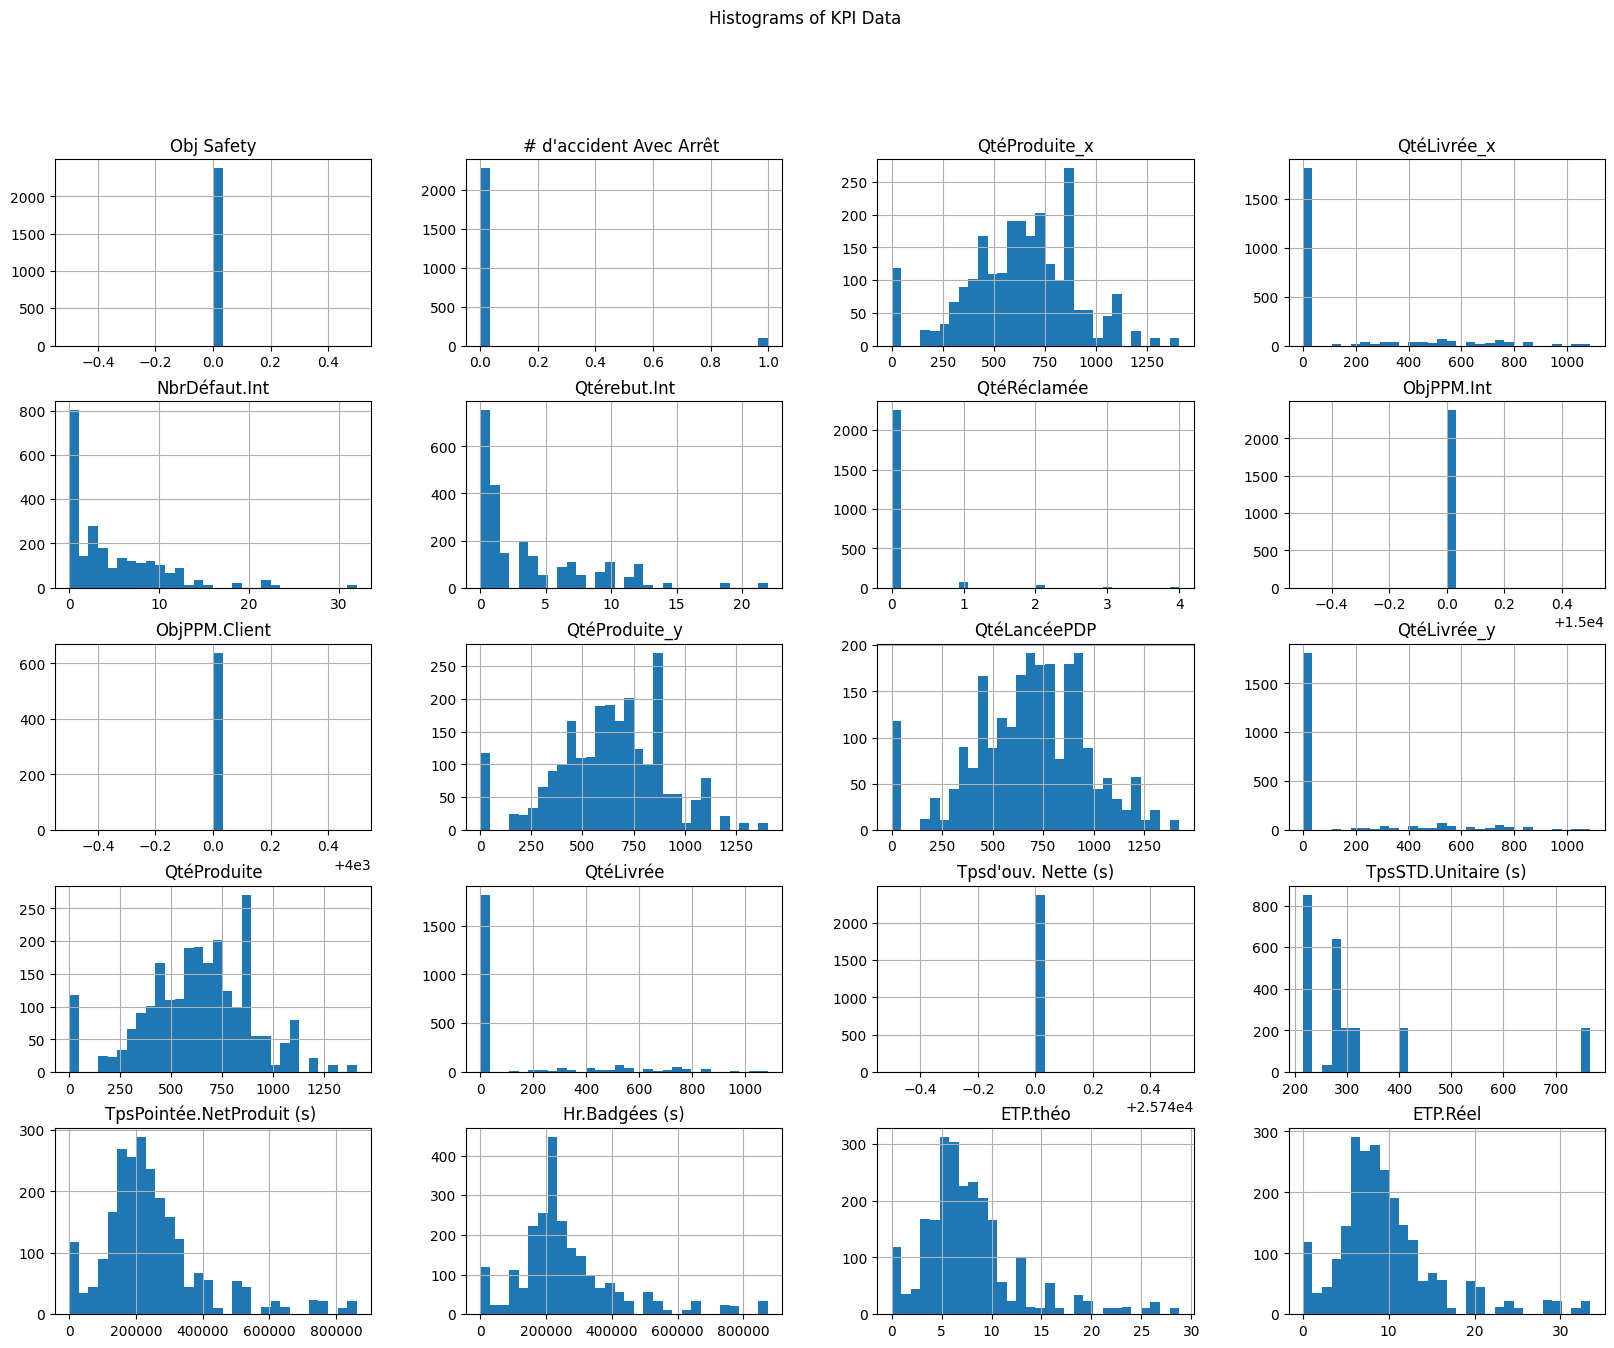

In [10]:
merged_final_data.hist(bins=30, figsize=(20, 15))
plt.suptitle('Histograms of KPI Data')
plt.show()

Category Analysis
Bar Charts

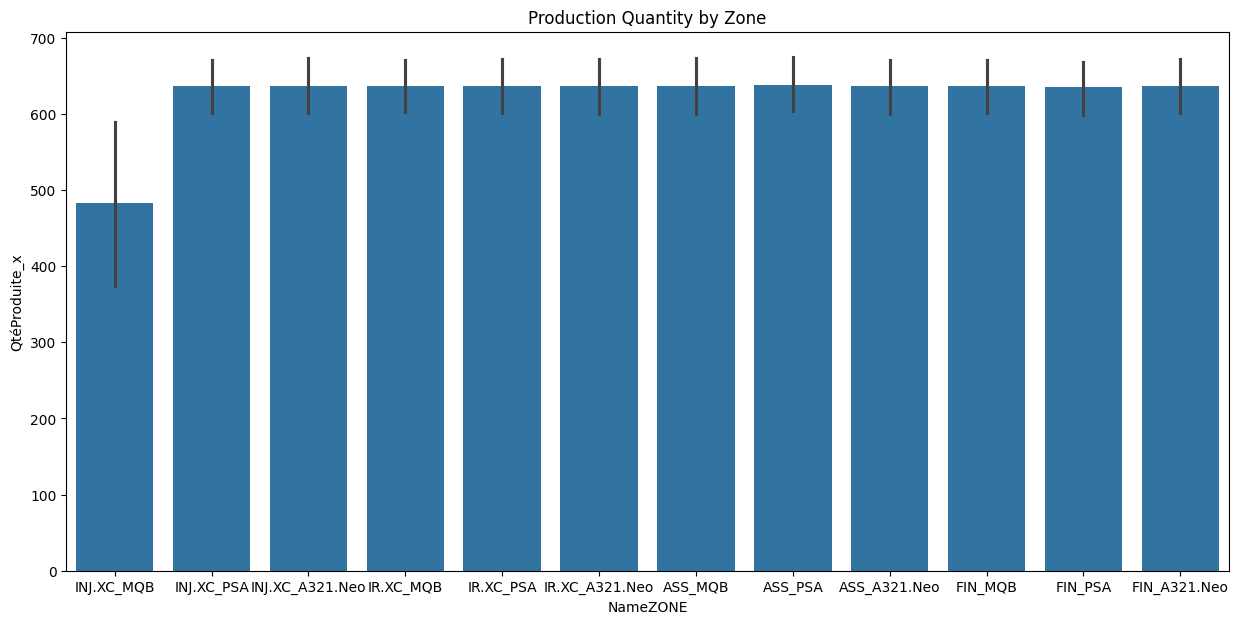

In [5]:
plt.figure(figsize=(15, 7))
sns.barplot(x='NameZONE', y='QtéProduite_x', data=merged_final_data)
plt.title('Production Quantity by Zone')
plt.show()

Pie Charts

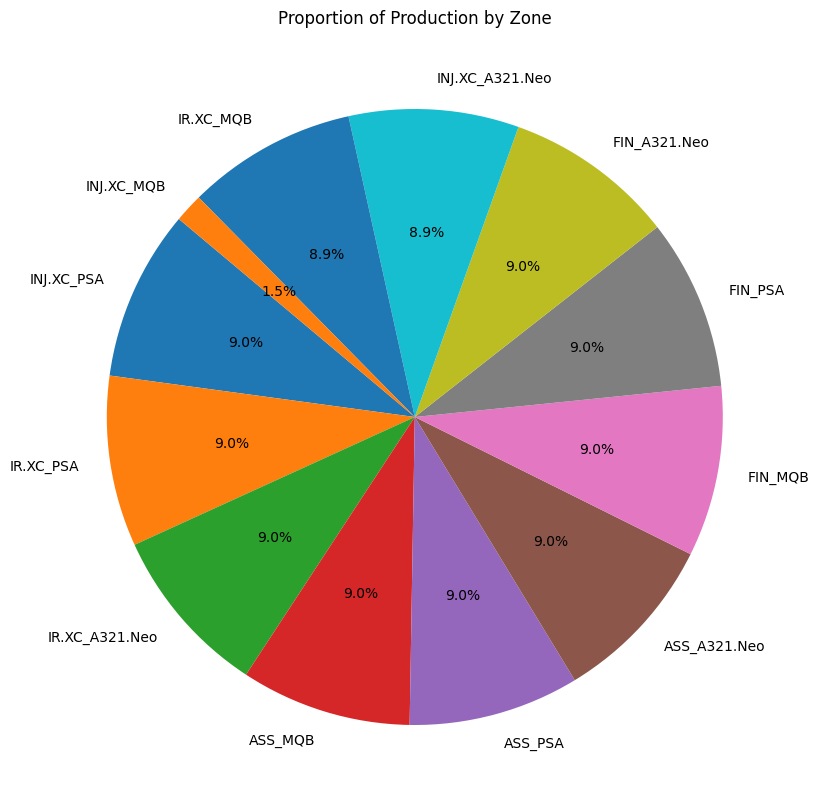

In [144]:
zone_counts = merged_final_data['NameZONE'].value_counts()
plt.figure(figsize=(10, 10))
plt.pie(zone_counts, labels=zone_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Production by Zone')
plt.show()

Correlation Analysis
Scatter Plots

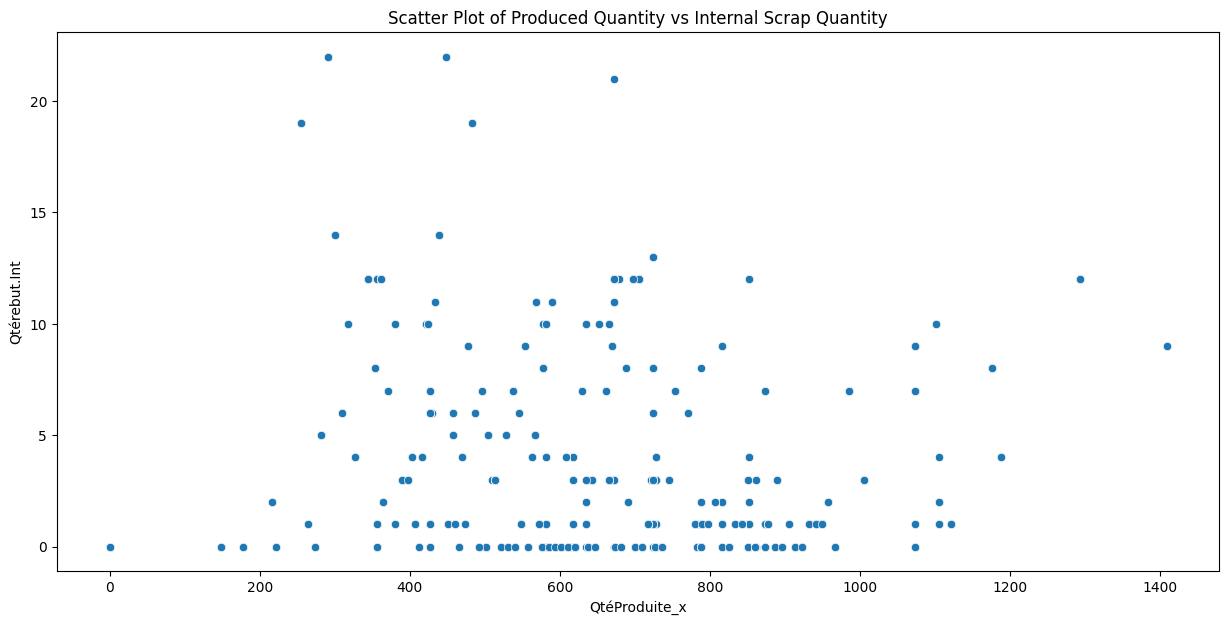

In [145]:
plt.figure(figsize=(15, 7))
sns.scatterplot(x='QtéProduite_x', y='Qtérebut.Int', data=merged_final_data)
plt.title('Scatter Plot of Produced Quantity vs Internal Scrap Quantity')
plt.show()

Heatmaps

/tmp/ipykernel_8508/3139882842.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(merged_final_data[['Tx. Abs ', 'Tx. Polyvalence', 'QtéProduite_x', 'QtéLivrée_x', 'NbrDéfaut.Int', 'Qtérebut.Int', 'QtéRéclamée ']].corr(), annot=True, cmap='coolwarm')


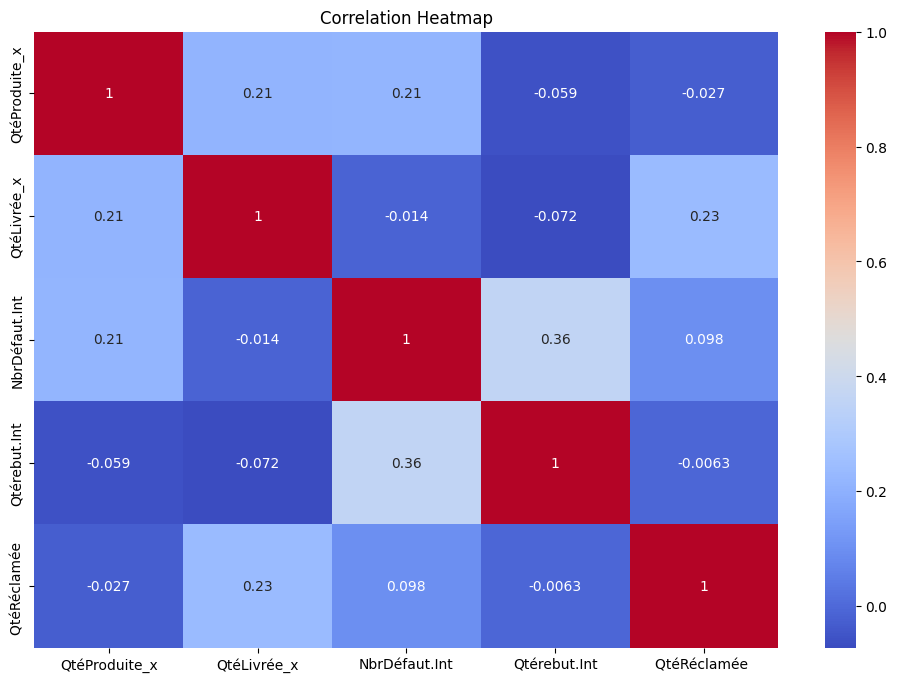

In [147]:
plt.figure(figsize=(12, 8))
sns.heatmap(merged_final_data[['Tx. Abs ', 'Tx. Polyvalence', 'QtéProduite_x', 'QtéLivrée_x', 'NbrDéfaut.Int', 'Qtérebut.Int', 'QtéRéclamée ']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

 Root Cause Analysis
Pareto Charts

/tmp/ipykernel_8508/2726743803.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=defect_counts.index, y=defect_counts.values, palette='viridis')


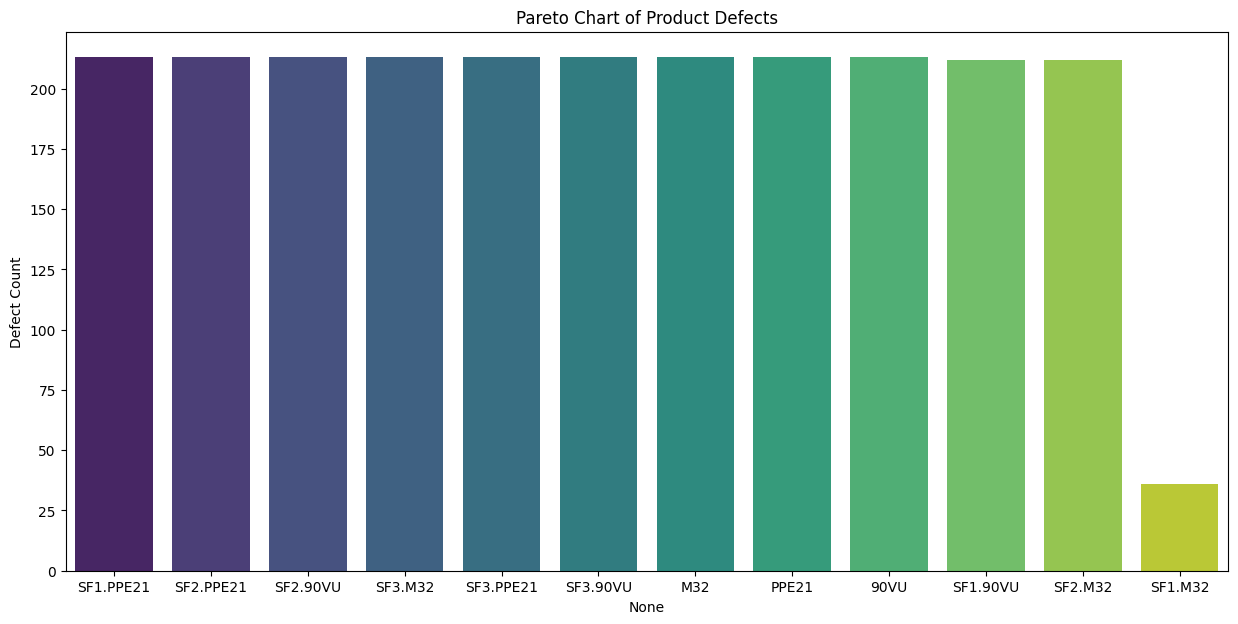

In [156]:
defect_counts = merged_final_data['Réf Produit'].value_counts()
plt.figure(figsize=(15, 7))
sns.barplot(x=defect_counts.index, y=defect_counts.values, palette='viridis')
plt.title('Pareto Chart of Product Defects')
plt.ylabel('Defect Count')
plt.show()

# Indexing Cost, Quality and Delivery into Mongodb after transformation

In [5]:
import pandas as pd
from pymongo import MongoClient

# Load CSV files into DataFrames
transformed_Quality = pd.read_csv('./TransformedQuality.csv')
transformed_Delivery = pd.read_csv('./TransformedDelivery.csv')
transformed_Cost = pd.read_csv('./TransformedCost.csv')
transformed_People = pd.read_csv('./TransformedPeople.csv')
transformed_Sfaty = pd.read_csv('./safty.csv')
# Connect to MongoDB container
client = MongoClient("mongodb://0.0.0.0:27017")

# Select database
db = client["managementsystemdetection"]

# Convert DataFrames to dictionaries
quality_data = transformed_Quality.to_dict(orient="records")
delivery_data = transformed_Delivery.to_dict(orient="records")
cost_data = transformed_Cost.to_dict(orient="records")
people_data = transformed_People.to_dict(orient="records")
safty_data = transformed_Sfaty.to_dict(orient="records")

# Insert data into respective MongoDB collections
quality_collection = db["qualitydata"]
delivery_collection = db["deliverydata"]
cost_collection = db["costdata"]
people_collection = db["peopledata"]
safty_collection = db["saftydata"]

result_quality = quality_collection.insert_many(quality_data)
result_delivery = delivery_collection.insert_many(delivery_data)
result_cost = cost_collection.insert_many(cost_data)
result_people = people_collection.insert_many(people_data)
result_safty = safty_collection.insert_many(safty_data)

# Print the number of documents inserted for each collection
print(f"Data inserted successfully into 'qualitydata' collection! Number of documents inserted: {len(result_quality.inserted_ids)}")
print(f"Data inserted successfully into 'deliverydata' collection! Number of documents inserted: {len(result_delivery.inserted_ids)}")
print(f"Data inserted successfully into 'costdata' collection! Number of documents inserted: {len(result_cost.inserted_ids)}")
print(f"Data inserted successfully into 'peopledata' collection! Number of documents inserted: {len(result_people.inserted_ids)}")
print(f"Data inserted successfully into 'peopledata' collection! Number of documents inserted: {len(result_safty.inserted_ids)}")


Data inserted successfully into 'qualitydata' collection! Number of documents inserted: 223
Data inserted successfully into 'deliverydata' collection! Number of documents inserted: 223
Data inserted successfully into 'costdata' collection! Number of documents inserted: 223
Data inserted successfully into 'peopledata' collection! Number of documents inserted: 223
Data inserted successfully into 'peopledata' collection! Number of documents inserted: 223


# Retrieve Data from MongoDB

In [3]:
from pymongo import MongoClient

# Replace with your MongoDB connection string
MONGO_URI = "mongodb://0.0.0.0:27017/"  # Adjust if using Docker
DB_NAME = "managementsystemdetection"  # Replace with your database name
COLLECTION_NAME = "saftydata"  # Replace with your collection name

def retrieve_data():
    # Connect to the MongoDB server
    client = MongoClient(MONGO_URI)

    # Access the database
    db = client[DB_NAME]

    # Access the collection
    collection = db[COLLECTION_NAME]

    # Retrieve all documents
    documents = collection.find()

    # Print each document
    for document in documents:
        print(document)

    # Close the connection
    client.close()

if __name__ == "__main__":
    retrieve_data()
 

 # DELETE DATABASE IN CASE SOMETHING WRONG HAPPENED

In [19]:
from pymongo import MongoClient

# Connect to MongoDB
client = MongoClient("mongodb://0.0.0.0:27017")

# Select the database you want to delete
db_name = "managementsystemdetection"

# Drop the database
client.drop_database(db_name)

print(f"Database '{db_name}' deleted successfully!")


Database 'managementsystemdetection' deleted successfully!


In [4]:
from pymongo import MongoClient

# Connect to the MongoDB server
client = MongoClient('mongodb://0.0.0.0:27017/')  # Update the URI if needed

# Access the database and collection
db = client['managementsystemdetection']  # Replace with your database name
collection = db['saftydata']  # Replace with your collection name

# Retrieve a sample document from the collection
sample_document = collection.find_one()

# Print the schema
if sample_document:
    print("Schema of saftydata collection:")
    for key, value in sample_document.items():
        print(f"{key}: {type(value).__name__}")
else:
    print("No documents found in the collection.")


No documents found in the collection.
